In [52]:
#使用tushare包获取某股票的历史行情数据
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tushare as ts

In [53]:
df =  pd.read_csv("601318.csv",index_col='date',parse_dates=['date'])[['open','close','low','high']]
df

,open,close,low,high
date,,,,
2007-03-01,21.878,20.473,20.040,22.302
2007-03-02,20.565,20.307,20.075,20.758
2007-03-05,20.119,19.419,19.047,20.202
2007-03-06,19.253,19.800,19.143,20.128
2007-03-07,19.817,20.338,19.651,20.522
...,...,...,...,...
2017-12-11,71.200,73.250,70.820,73.310
2017-12-12,73.250,71.210,71.170,73.560
2017-12-13,71.210,72.120,70.200,72.620


使用pandas包计算该股票历史数据的5日均线和60日均线

In [33]:
# df['ma5'] = np.nan
# df['ma30'] = np.nan

# for i in range(4,len(df)):
#     df.loc[df.index[i],'ma5'] = df['close'][i-4:i+1].mean()


# for i in range(29,len(df)):
#     df.loc[df.index[i],'ma30'] = df['close'][i-29:i+1].mean()
    

In [54]:
df['ma5'] = df['close'].rolling(5).mean()
df['ma30'] = df['close'].rolling(30).mean()
df

,open,close,low,high,ma5,ma30
date,,,,,,
2007-03-01,21.878,20.473,20.040,22.302,NaN,NaN
2007-03-02,20.565,20.307,20.075,20.758,NaN,NaN
2007-03-05,20.119,19.419,19.047,20.202,NaN,NaN
2007-03-06,19.253,19.800,19.143,20.128,NaN,NaN
2007-03-07,19.817,20.338,19.651,20.522,20.0674,NaN
...,...,...,...,...,...,...
2017-12-11,71.200,73.250,70.820,73.310,70.7960,70.198667
2017-12-12,73.250,71.210,71.170,73.560,70.7980,70.427000
2017-12-13,71.210,72.120,70.200,72.620,71.3420,70.693667


#使用matplotlib包可视化历史数据的收盘价和两条均线

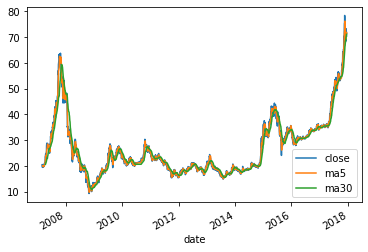

In [55]:
# df=df[:100]
df[['close','ma5','ma30']].plot()
plt.show()

分析输出所有金叉日期和死叉日期

金叉：
今天5日均线<30日均线；
明天5日均线>30日均线

In [67]:
df = df.dropna()
df =  df['2010-01-01':]

In [61]:
golden_cross = []
death_cross = []
for i in range(1,len(df)):
    if df['ma5'][i] > df['ma30'][i] and df['ma5'][i-1] < df['ma30'][i-1]:
        golden_cross.append(df.index[i].to_pydatetime())
    if df['ma5'][i] <= df['ma30'][i] and df['ma5'][i-1] > df['ma30'][i-1]:
        death_cross.append(df.index[i].to_pydatetime())
death_cross        

# golden_cross

[datetime.datetime(2007, 6, 4, 0, 0),
 datetime.datetime(2007, 11, 6, 0, 0),
 datetime.datetime(2007, 12, 13, 0, 0),
 datetime.datetime(2008, 5, 20, 0, 0),
 datetime.datetime(2008, 7, 31, 0, 0),
 datetime.datetime(2008, 8, 13, 0, 0),
 datetime.datetime(2008, 9, 8, 0, 0),
 datetime.datetime(2008, 11, 24, 0, 0),
 datetime.datetime(2009, 3, 3, 0, 0),
 datetime.datetime(2009, 4, 28, 0, 0),
 datetime.datetime(2009, 5, 18, 0, 0),
 datetime.datetime(2009, 8, 11, 0, 0),
 datetime.datetime(2009, 11, 26, 0, 0),
 datetime.datetime(2010, 4, 29, 0, 0),
 datetime.datetime(2010, 11, 16, 0, 0),
 datetime.datetime(2010, 12, 20, 0, 0),
 datetime.datetime(2011, 2, 23, 0, 0),
 datetime.datetime(2011, 3, 17, 0, 0),
 datetime.datetime(2011, 5, 5, 0, 0),
 datetime.datetime(2011, 7, 21, 0, 0),
 datetime.datetime(2011, 11, 21, 0, 0),
 datetime.datetime(2012, 3, 9, 0, 0),
 datetime.datetime(2012, 6, 5, 0, 0),
 datetime.datetime(2012, 7, 27, 0, 0),
 datetime.datetime(2012, 9, 17, 0, 0),
 datetime.datetime(2012, 

In [68]:

sr1 = df['ma5']<df['ma30']


# TTTTTTTTTTTTTTTFFFFFFFFFFFTTTTTTTTTT
#  FFFFFFFFFFFFFFFTTTTTTTTTTTFFFFFFFFFF
sr2 = df['ma5']>=df['ma30']

death_cross = df[sr1 & sr2.shift(1)].index
death_cross

DatetimeIndex(['2010-04-29', '2010-11-16', '2010-12-20', '2011-02-23',
               '2011-03-17', '2011-05-05', '2011-07-21', '2011-11-21',
               '2012-03-09', '2012-06-05', '2012-07-27', '2012-09-17',
               '2012-10-29', '2013-02-25', '2013-04-24', '2013-05-13',
               '2013-10-09', '2013-10-17', '2013-12-23', '2014-01-28',
               '2014-05-19', '2014-06-25', '2014-08-26', '2014-09-15',
               '2015-02-02', '2015-05-18', '2015-06-02', '2015-06-18',
               '2015-12-01', '2015-12-10', '2016-01-05', '2016-04-12',
               '2016-05-06', '2016-06-27', '2016-08-08', '2016-09-29',
               '2016-12-20', '2017-03-02', '2017-04-13', '2017-08-11',
               '2017-09-20', '2017-12-07'],
              dtype='datetime64[ns]', name='date', freq=None)

In [69]:
sr1 = df['ma5']<df['ma30']
sr2 = df['ma5']>=df['ma30']

golden_cross = df[~(sr1 | sr2.shift(1))].index
golden_cross

DatetimeIndex(['2010-03-22', '2010-06-23', '2010-12-09', '2011-02-18',
               '2011-03-04', '2011-04-06', '2011-06-30', '2011-10-28',
               '2012-01-13', '2012-04-17', '2012-06-13', '2012-09-13',
               '2012-09-27', '2012-12-07', '2013-04-22', '2013-05-09',
               '2013-08-14', '2013-10-14', '2013-11-01', '2014-01-21',
               '2014-04-02', '2014-05-28', '2014-07-04', '2014-09-05',
               '2014-10-31', '2015-03-17', '2015-05-25', '2015-06-08',
               '2015-09-22', '2015-12-04', '2015-12-17', '2016-03-04',
               '2016-04-15', '2016-05-31', '2016-07-01', '2016-08-09',
               '2016-11-01', '2017-01-18', '2017-03-24', '2017-04-26',
               '2017-08-22', '2017-10-12', '2017-12-08'],
              dtype='datetime64[ns]', name='date', freq=None)

假如我从2010年1月1日开始，初始资金为100000元，金叉尽量买入，死叉全部卖出，则到今天为止，我的炒股收益率如何？

In [80]:
first_money = 100000
money =first_money
hold = 0 #持有多少股
sr1 = pd.Series(1,index=golden_cross)
sr2 = pd.Series(0,index=death_cross)
sr = sr1.append(sr2).sort_index()

for i in range(0,len(sr)):
    p = df['open'][sr.index[i]]
    if sr.iloc[i]==1:
        #金叉
        buy = (money // (100*p))
        hold += buy*100
        money -= buy*100*p
    else: 
        money += hold*p
        hold = 0

p = df['open'][-1]        
now_money = hold * p +money

print(now_money -first_money)

452451.69999999995
